In [493]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
import spacy
import os
import matplotlib.pyplot as plt

In [ ]:
# print(spacy.__version__)
!py -m spacy download ru_core_news_sm

In [495]:
nltk.download('averaged_perceptron_tagger') #для pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [496]:
nlp = spacy.load('ru_core_news_sm')
stop = stopwords.words("russian")

In [497]:
stop.extend(["около", "это"])

In [524]:
def clean_tokenizer(adress):
    text = open(adress, "r", encoding = "utf-8").read()
    text = text.lower()
    text1 = WhitespaceTokenizer().tokenize(text)
    words_filtered = [word for word in text1 if word not in stop]

    new = []
    for word in words_filtered:
        if "\n" in word or "I" in word or "--" in word or "—" in word or "-" in word\
            or chr(8211) in word or chr(8230) in word or chr(1080) in word\
                or "своей" in word or "очень" in word: 
            words_filtered.remove(word)
            continue
        if "." in word:
            word = word.replace(".", "")
            if "." in word:
                word = word.replace(".", "")
                if "." in word:
                    word = word.replace(".", "")
        if "," in word or "!" in word or "?" in word or ":" in word:
            word = word.replace("!", "")
            word = word.replace(",", "")
            word = word.replace("?", "")
            word = word.replace(":", "")
        if "\"" in word or "--" in word:
            word = word.replace("\"", "")
            word = word.replace("--", "")
        new.append(word)
    return new


In [525]:
d = {}
for filename in os.scandir("6_texts"):
        d["{}".format(filename.name)] = clean_tokenizer(filename.path)      
#я не спёрла из интернета, я подсмотрела и научилась

**Лексическое разнообразие** <br>

<BarContainer object of 6 artists>

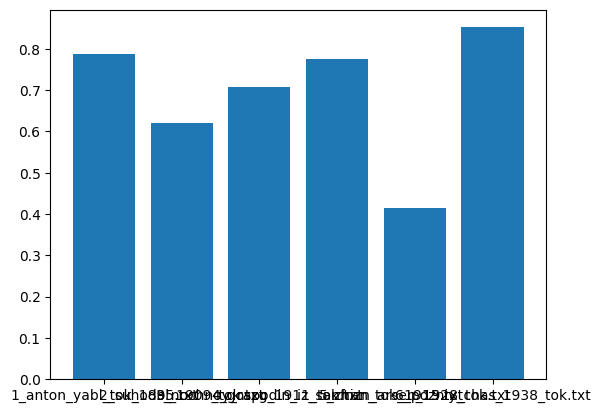

In [500]:
def word_variety (text):
    unique = len(set(text))/len(text)
    return unique

texts_v = []
for key in d.keys():
    texts_v.append(word_variety(d[key]))

x_axiss = ['1_anton_yabl_tok_1895.txt', '2_suhodol_1909_tok.txt', '3_nochnoy_razg_1911_tok.txt',\
           '4_gospodin_iz_sanfran_tok_1915.txt', '5_zhizn_arsen_1928_tok.txt', '6_pozniy_chas_1938_tok.txt']

plt.bar(x_axiss, texts_v)

Вывод 1: лексическое разнообразие почти не менялось за время жизни Бунина. <br>
Но в произведении "Поздний час" оно резко возросло. Скорее всего это связано с тем, что это одно из последих прозаических произведений автора.

**Преобладающие части речи в произведениях**

In [501]:
%pip install pymorphy2
import pymorphy3
from collections import Counter
morph = pymorphy3.MorphAnalyzer()
import numpy as np

In [502]:
def spp (text) : #spp - speech parts
    adj = []
    for word in text:
        word = morph.parse(word)[0].normal_form
        adj.append(morph.parse(word)[0].tag.POS)
    adj2 = Counter(adj)
    return adj2.most_common(4)

texts_spp = []
for key in d.keys():
    texts_spp.append(spp(d[key]))

In [503]:
# НЕ ТРОГАТЬ ЭТУ ЯЧЕЙКУ

right = ["NOUN","ADJF","INFN", "ADVB", "CONJ"]
a = texts_spp[1][1]
texts_spp[1][1] = texts_spp[1][2]
texts_spp[1][2] = a

b = texts_spp[2][1]
texts_spp[2][1] = texts_spp[2][2]
texts_spp[2][2] = b

In [504]:
texts_spp

[[('NOUN', 644), ('ADJF', 303), ('INFN', 267), ('ADVB', 146)],
 [('NOUN', 2062), ('INFN', 979), ('ADJF', 980), ('ADVB', 468)],
 [('NOUN', 711), ('ADJF', 337), ('INFN', 459), ('ADVB', 139)],
 [('NOUN', 731), ('ADJF', 474), ('INFN', 326), ('ADVB', 217)],
 [('NOUN', 9208), ('ADJF', 6811), ('INFN', 4587), ('ADVB', 3141)],
 [('NOUN', 222), ('ADJF', 156), ('INFN', 113), ('ADVB', 75)]]

In [505]:
x = ["СУЩ","ПРИЛ", "ГЛАГ", "НАР"]

def helper(k,n):
    x = []
    y = []
    for l in texts_spp[k]:
        x.append(l[n])
    if n == 0:
        return x        
    elif n == 1:       
        for el in x:
            true_el = el/sum(x)
            y.append(true_el)
    return y

y1 = helper(0,1)
y2 = helper(1,1)
y3 = helper(2,1)
y4 = helper(3,1)
y5 = helper(4,1)
y6 = helper(5,1)

[('NOUN', 1271), ('ADJF', 621), ('INFN', 619), ('ADVB', 229), ('CONJ', 80)]
[('NOUN', 4259), ('INFN', 2471), ('ADJF', 1957), ('ADVB', 792), ('CONJ', 398)]
[('NOUN', 1443), ('INFN', 1172), ('ADJF', 591), ('ADVB', 244), ('NPRO', 163)]
[('NOUN', 1724), ('ADJF', 998), ('INFN', 886), ('ADVB', 356), (None, 144)]
[('NOUN', 19232), ('ADJF', 13231), ('INFN', 11037), ('ADVB', 5002), ('NPRO', 1996)]
[('NOUN', 433), ('ADJF', 312), ('INFN', 231), ('ADVB', 117), ('NPRO', 50)]

<function matplotlib.pyplot.show(close=None, block=None)>

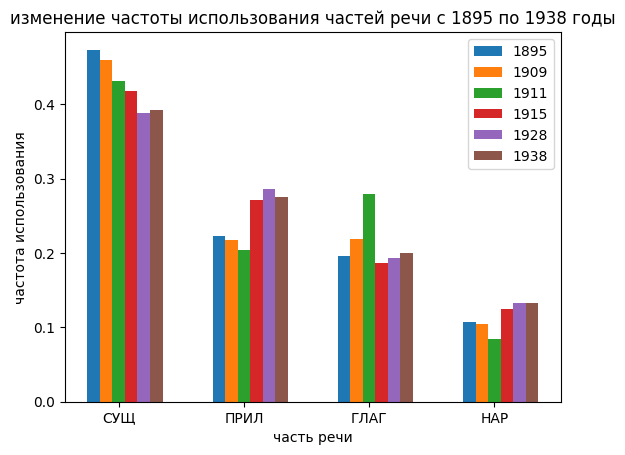

In [506]:
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2,y1,0.1,label="1895")
plt.bar(x_axis - 0.1,y2,0.1,label="1909")
plt.bar(x_axis - 0,y3,0.1,label="1911")
plt.bar(x_axis + 0.1,y4,0.1,label="1915")
plt.bar(x_axis + 0.2,y5,0.1,label="1928")
plt.bar(x_axis + 0.3,y6,0.1,label="1938")

plt.xticks(x_axis, x) 
plt.xlabel("часть речи") 
plt.ylabel("частота использования") 
plt.title("изменение частоты использования частей речи с 1895 по 1938 годы") 
plt.legend() 

plt.show

Вывод2: У Бунина наблюдается обилие прилагательных в произведениях поздних лет. <br>
Есть гипотеза, что существует тренд к увеличению описательной составляющей. <br>
Наречия тоже служат показателем большего количества описаний <br>
<br>
Вывод3: Причём посередине двух периодов наблюдается скачок, (на произведении "ночной разговор"). <br>
В произведении и правда много диалогов -> глаголы "сказал", "отозвался", "спросил"

**Самые частые слова**

In [526]:
d["1_anton_yabl_tok_1895.txt"]

def common_words(text):
    text2 = Counter(text).most_common(5)
    return text2

texts_cw = []
for key in d.keys():
    texts_cw.append(common_words(d[key]))

for row in texts_cw:
    for el in row:
        print(el[0], end = " ")
    print("\n")

помню точно поле доме весь 

наталья петр наташка она дедушка 

федот пашка он стал прямо 

снова точно возле которых самого 

я день весь время то 

свете месяц темные город пошел 



Вывод4: не смогла почистить датасет от стоп-слов